# Goal of the project

The goal of this project is to build a regression model to predict new coronavirus cases in the UK.

# Useful Links

Link for the repository on GitHub:

https://github.com/tlemenestrel/Coronavirus_Risk_Model

Link for the .pickle file:

https://github.com/tlemenestrel/Coronavirus_Risk_Model/blob/master/Data/all_data.pickle

# Risk Prediction Model

### Import the necessary modules

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# XGBoost model 

import xgboost as xgb

# Statistics

from sklearn.metrics import mean_squared_error, r2_score

# Train-test-split

from sklearn.model_selection import train_test_split

# Standard scaler for preprocessing

from sklearn.preprocessing import StandardScaler

# Random and Grid Search for hyperparameters tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Plotting features importance for XGBoost

from xgboost import plot_importance

# Plotting out one tree of the XGBoost model

from sklearn.tree import export_graphviz
from graphviz import Source

### Downloading the Coronavirus .pickle file from GitHub

In [79]:
url_coronavirus_data = "https://raw.githubusercontent.com/tlemenestrel/Coronavirus_Risk_Model/master/Data/all_data.pickle"

# Reading the downloaded content and making it a pandas dataframe

df = pd.read_pickle(url_coronavirus_data)

# Printing out the first 5 rows of the dataframe

print (df.head())
print (df.shape)

     Area name  Area code                   Area type Specimen date  \
0  Westminster  E09000033  Upper tier local authority    2020-03-10   
1  Westminster  E09000033  Upper tier local authority    2020-03-11   
2  Westminster  E09000033  Lower tier local authority    2020-03-12   
3  Westminster  E09000033  Lower tier local authority    2020-03-13   
4  Westminster  E09000033  Lower tier local authority    2020-03-14   

   Daily lab-confirmed cases  Cumulative lab-confirmed cases       Date  \
0                        6.0                              24 2020-03-10   
1                       14.0                              38 2020-03-11   
2                       14.0                              52 2020-03-12   
3                        8.0                              60 2020-03-13   
4                       10.0                              70 2020-03-14   

   rolling_mean_3  rolling_mean_7  grad_0  ...  Age 85 plus  \
0       18.000000       11.571429     9.0  ...          1.7

In [80]:
df.head(13625)

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Date,rolling_mean_3,rolling_mean_7,grad_0,...,Age 85 plus,Working age 16 to 64,Old Age Dependency Ratio,Dependency Ratio,ref_r0,LAD16NM,AREAEHECT,AREACHECT,AREAIHECT,AREALHECT
0,Westminster,E09000033,Upper tier local authority,2020-03-10,6.0,24,2020-03-10,18.000000,11.571429,9.0,...,1.7,70.6,17.7,41.6,1.500000,Westminster,2203.01,2148.70,0.0,2148.70
1,Westminster,E09000033,Upper tier local authority,2020-03-11,14.0,38,2020-03-11,26.666667,16.571429,13.0,...,1.7,70.6,17.7,41.6,1.381818,Westminster,2203.01,2148.70,0.0,2148.70
2,Westminster,E09000033,Lower tier local authority,2020-03-12,14.0,52,2020-03-12,38.000000,23.428571,26.0,...,1.7,70.6,17.7,41.6,1.485714,Westminster,2203.01,2148.70,0.0,2148.70
3,Westminster,E09000033,Lower tier local authority,2020-03-13,8.0,60,2020-03-13,50.000000,30.714286,34.0,...,1.7,70.6,17.7,41.6,1.558442,Westminster,2203.01,2148.70,0.0,2148.70
4,Westminster,E09000033,Lower tier local authority,2020-03-14,10.0,70,2020-03-14,60.666667,39.142857,36.0,...,1.7,70.6,17.7,41.6,1.538462,Westminster,2203.01,2148.70,0.0,2148.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,Hartlepool,E06000001,Lower tier local authority,2020-05-02,3.0,221,2020-05-02,218.000000,206.428571,18.0,...,2.5,61.4,31.7,63.0,1.094059,Hartlepool,9844.17,9355.95,0.0,9355.95
13619,Hartlepool,E06000001,Lower tier local authority,2020-05-03,1.0,222,2020-05-03,220.333333,211.428571,10.0,...,2.5,61.4,31.7,63.0,1.082927,Hartlepool,9844.17,9355.95,0.0,9355.95
13620,Hartlepool,E06000001,Lower tier local authority,2020-05-04,7.0,229,2020-05-04,224.000000,216.571429,7.0,...,2.5,61.4,31.7,63.0,1.067599,Hartlepool,9844.17,9355.95,0.0,9355.95
13621,Hartlepool,E06000001,Lower tier local authority,2020-05-05,1.0,230,2020-05-05,227.000000,220.857143,11.0,...,2.5,61.4,31.7,63.0,1.067285,Hartlepool,9844.17,9355.95,0.0,9355.95


### Notes on the dataset

-The rolling mean 3 and rolling mean 7 are the mean of the total cases in the last 3 and 7 days.

-grad_O is the average number of new cases in 3 days and 7 days 

-Age 85 and working age 16 to 64 is the number of people in that area or bouroght. Proportiopn

### Function to print out the data type of each column

In [81]:
def print_data_type_of_dataframe_columns(df):
    
    dataTypeSeries = df.dtypes
 
    print('Data type of each column of Dataframe :')
    print(dataTypeSeries)

### Printing out the data type of each columns of the dataframe

In [82]:
print_data_type_of_dataframe_columns(df)

Data type of each column of Dataframe :
Area name                                      object
Area code                                      object
Area type                                      object
Specimen date                                  object
Daily lab-confirmed cases                     float64
Cumulative lab-confirmed cases                  int64
Date                                   datetime64[ns]
rolling_mean_3                                float64
rolling_mean_7                                float64
grad_0                                        float64
grad_n3                                       float64
grad_n7                                       float64
current_r0                                    float64
rolling_r0_3                                  float64
rolling_r0_7                                  float64
K_value_1                                     float64
K_value_2                                     float64
cases_over_100_startdelta                 

### Notes

All columns are already converted to float or int, which is what we need for an ML model. Thus, we will not have to convert any column to a different type.

# Exploratory Data Analysis (EDA)

In this part of the notebook, we are going to perform initial investigations on the data to discover patterns, spot anomalies, test hypotheses and  check assumptions with the help of summary statistics and graphical representations.

### Printing out key statistics for each column of the dataframe

In [83]:
df.describe()

,Daily lab-confirmed cases,Cumulative lab-confirmed cases,rolling_mean_3,rolling_mean_7,grad_0,grad_n3,grad_n7,current_r0,rolling_r0_3,rolling_r0_7,...,Age 65 plus,Age 85 plus,Working age 16 to 64,Old Age Dependency Ratio,Dependency Ratio,ref_r0,AREAEHECT,AREACHECT,AREAIHECT,AREALHECT
count,13622.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13316.000000,12091.000000,...,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000,13623.000000
mean,8.928351,255.654188,246.704103,228.811736,26.925787,26.679806,26.433825,1.252444,1.254937,1.241641,...,19.191654,2.586787,61.811554,31.593995,62.374448,1.205473,39694.503537,38915.433073,45.812123,38869.620951
std,9.747958,289.850831,285.592036,275.993025,27.147803,26.316626,27.242455,0.879882,0.650673,0.389269,...,4.850566,0.714901,3.813697,9.554316,9.594569,0.150401,58494.918623,57836.558829,203.514221,57748.500147
min,0.000000,9.000000,8.000000,6.000000,3.000000,3.000000,3.000000,0.054795,0.135944,0.460170,...,6.400000,0.800000,52.800000,8.800000,32.800000,1.008251,314.960000,290.400000,0.000000,290.400000
25%,3.000000,73.000000,67.666667,56.000000,10.000000,10.500000,10.000000,0.700000,0.820103,0.965582,...,16.100000,2.100000,59.500000,25.300000,58.100000,1.079727,7888.250000,7669.700000,0.000000,7669.700000
50%,6.000000,155.000000,148.000000,133.285714,18.000000,17.500000,17.000000,1.000000,1.108565,1.157662,...,19.300000,2.600000,61.300000,31.500000,63.300000,1.160221,19842.720000,18062.790000,0.000000,18062.790000
75%,11.000000,328.500000,315.166667,291.357143,34.000000,33.500000,33.000000,1.500000,1.511111,1.430112,...,22.300000,3.000000,63.200000,37.400000,68.100000,1.313031,53096.220000,51443.210000,0.000000,51443.210000
max,131.000000,3075.000000,3074.333333,3029.428571,362.000000,325.000000,362.000000,14.500000,6.841270,4.033333,...,33.200000,4.800000,75.300000,62.600000,89.400000,1.789474,507818.030000,502621.490000,1946.090000,501380.240000


# Price, rent and area

### Function to plot out one column of a dataframe

In [84]:
def plot_out_one_column_of_a_dataframe(df, column):
    
    ax = df[column].plot(kind="bar")

### Plotting out the Grad_n3 column

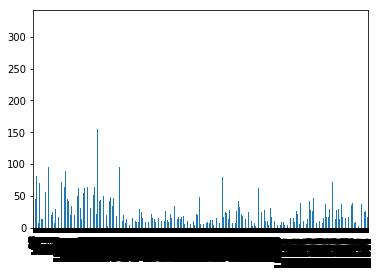

In [85]:
plot_out_one_column_of_a_dataframe(df,'grad_n3')

### Notes

There is quite a bit of disparity in the data for those 3 variables. For better results, we will remove all examples above 3 standard deviations.

### Removing outliers that are above 3 standard deviations

In [86]:
#df = df[((df.Price - df.Price.mean()) / df.Price.std()).abs() < 3]
#df = df[((df.Rent - df.Rent.mean()) / df.Rent.std()).abs() < 3]
#df = df[((df.Area - df.Area.mean()) / df.Area.std()).abs() < 3]

print (df.shape)

(13623, 45)


# Data Preparation

### Adding underscores for the variables

In [87]:
df.columns = df.columns.str.replace(' ', '_')

print (df.head())

     Area_name  Area_code                   Area_type Specimen_date  \
0  Westminster  E09000033  Upper tier local authority    2020-03-10   
1  Westminster  E09000033  Upper tier local authority    2020-03-11   
2  Westminster  E09000033  Lower tier local authority    2020-03-12   
3  Westminster  E09000033  Lower tier local authority    2020-03-13   
4  Westminster  E09000033  Lower tier local authority    2020-03-14   

   Daily_lab-confirmed_cases  Cumulative_lab-confirmed_cases       Date  \
0                        6.0                              24 2020-03-10   
1                       14.0                              38 2020-03-11   
2                       14.0                              52 2020-03-12   
3                        8.0                              60 2020-03-13   
4                       10.0                              70 2020-03-14   

   rolling_mean_3  rolling_mean_7  grad_0  ...  Age_85_plus  \
0       18.000000       11.571429     9.0  ...          1.7

### Dropping columns that are not relevant

In [88]:
df = df.drop(['Area_name', 'Area_code', 'Area_type', 'Specimen_date','Dependency_Ratio','LAD16NM','AREAIHECT', 'AREACHECT', 'name'], axis = 1)

### Transform date to days of the year for ML processing

In [89]:
# Could be done in a different way

df['dayofyear'] = df['Date'].dt.dayofyear 

### Dropping the date colum

In [90]:
df = df.drop(['Date'], axis = 1) 

### Dropping the rows where at least one element is missing

In [91]:
df = df.dropna()

print (df.shape)

(12090, 36)


## Normalization

In this case, we do not have many outliers. Thus, we will use min-max normalization.

### Min-max normalization

In [92]:
def min_max_normalization_of_one_column(df,column):

    normalized_column = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return normalized_column

In [106]:
#df["Price"] = min_max_normalization_of_one_column(df,"Price")
#df["Area"] = min_max_normalization_of_one_column(df,"Area")
#df["Rent"] = min_max_normalization_of_one_column(df,"Rent")

print (df.head())

   Daily_lab-confirmed_cases  Cumulative_lab-confirmed_cases  rolling_mean_3  \
5                        5.0                              75       68.333333   
6                       14.0                              89       78.000000   
7                       10.0                              99       87.666667   
8                        9.0                             108       98.666667   
9                        9.0                             117      108.000000   

   rolling_mean_7  grad_0  grad_n3  grad_n7  current_r0  rolling_r0_3  \
5       48.142857    32.0     29.0     26.0    0.900000      2.244444   
6       58.285714    23.0     28.5     34.0    0.535714      1.089683   
7       69.000000    29.0     32.5     36.0    0.863636      0.766450   
8       79.000000    29.0     30.5     32.0    1.333333      0.910895   
9       88.285714    33.0     28.0     23.0    1.266667      1.154545   

   rolling_r0_7  ...  population_density_deciles  Age_0_to_15  Age_65_plus  \
5 

## Encoding

### One-hot encoding

In [94]:
# Using the get_dummies function to one-hot encode several categorical variables

#df = pd.get_dummies(df, columns= ['Region'])
#df = pd.get_dummies(df, columns= ['City'])
#df = pd.get_dummies(df, columns= ['Type'])

#print (df.head())

### Notes

Here, no encoding is needed as the categorical variables have already been removed.

# Features Selection

### Pearson Correlation Matrix

In [95]:
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_minimum_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.savefig('Images/pearson_correlation_matrix.png', bbox_inches='tight')
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    relevant_features = target[target>correlation_minimum_criteria]
    print(relevant_features)

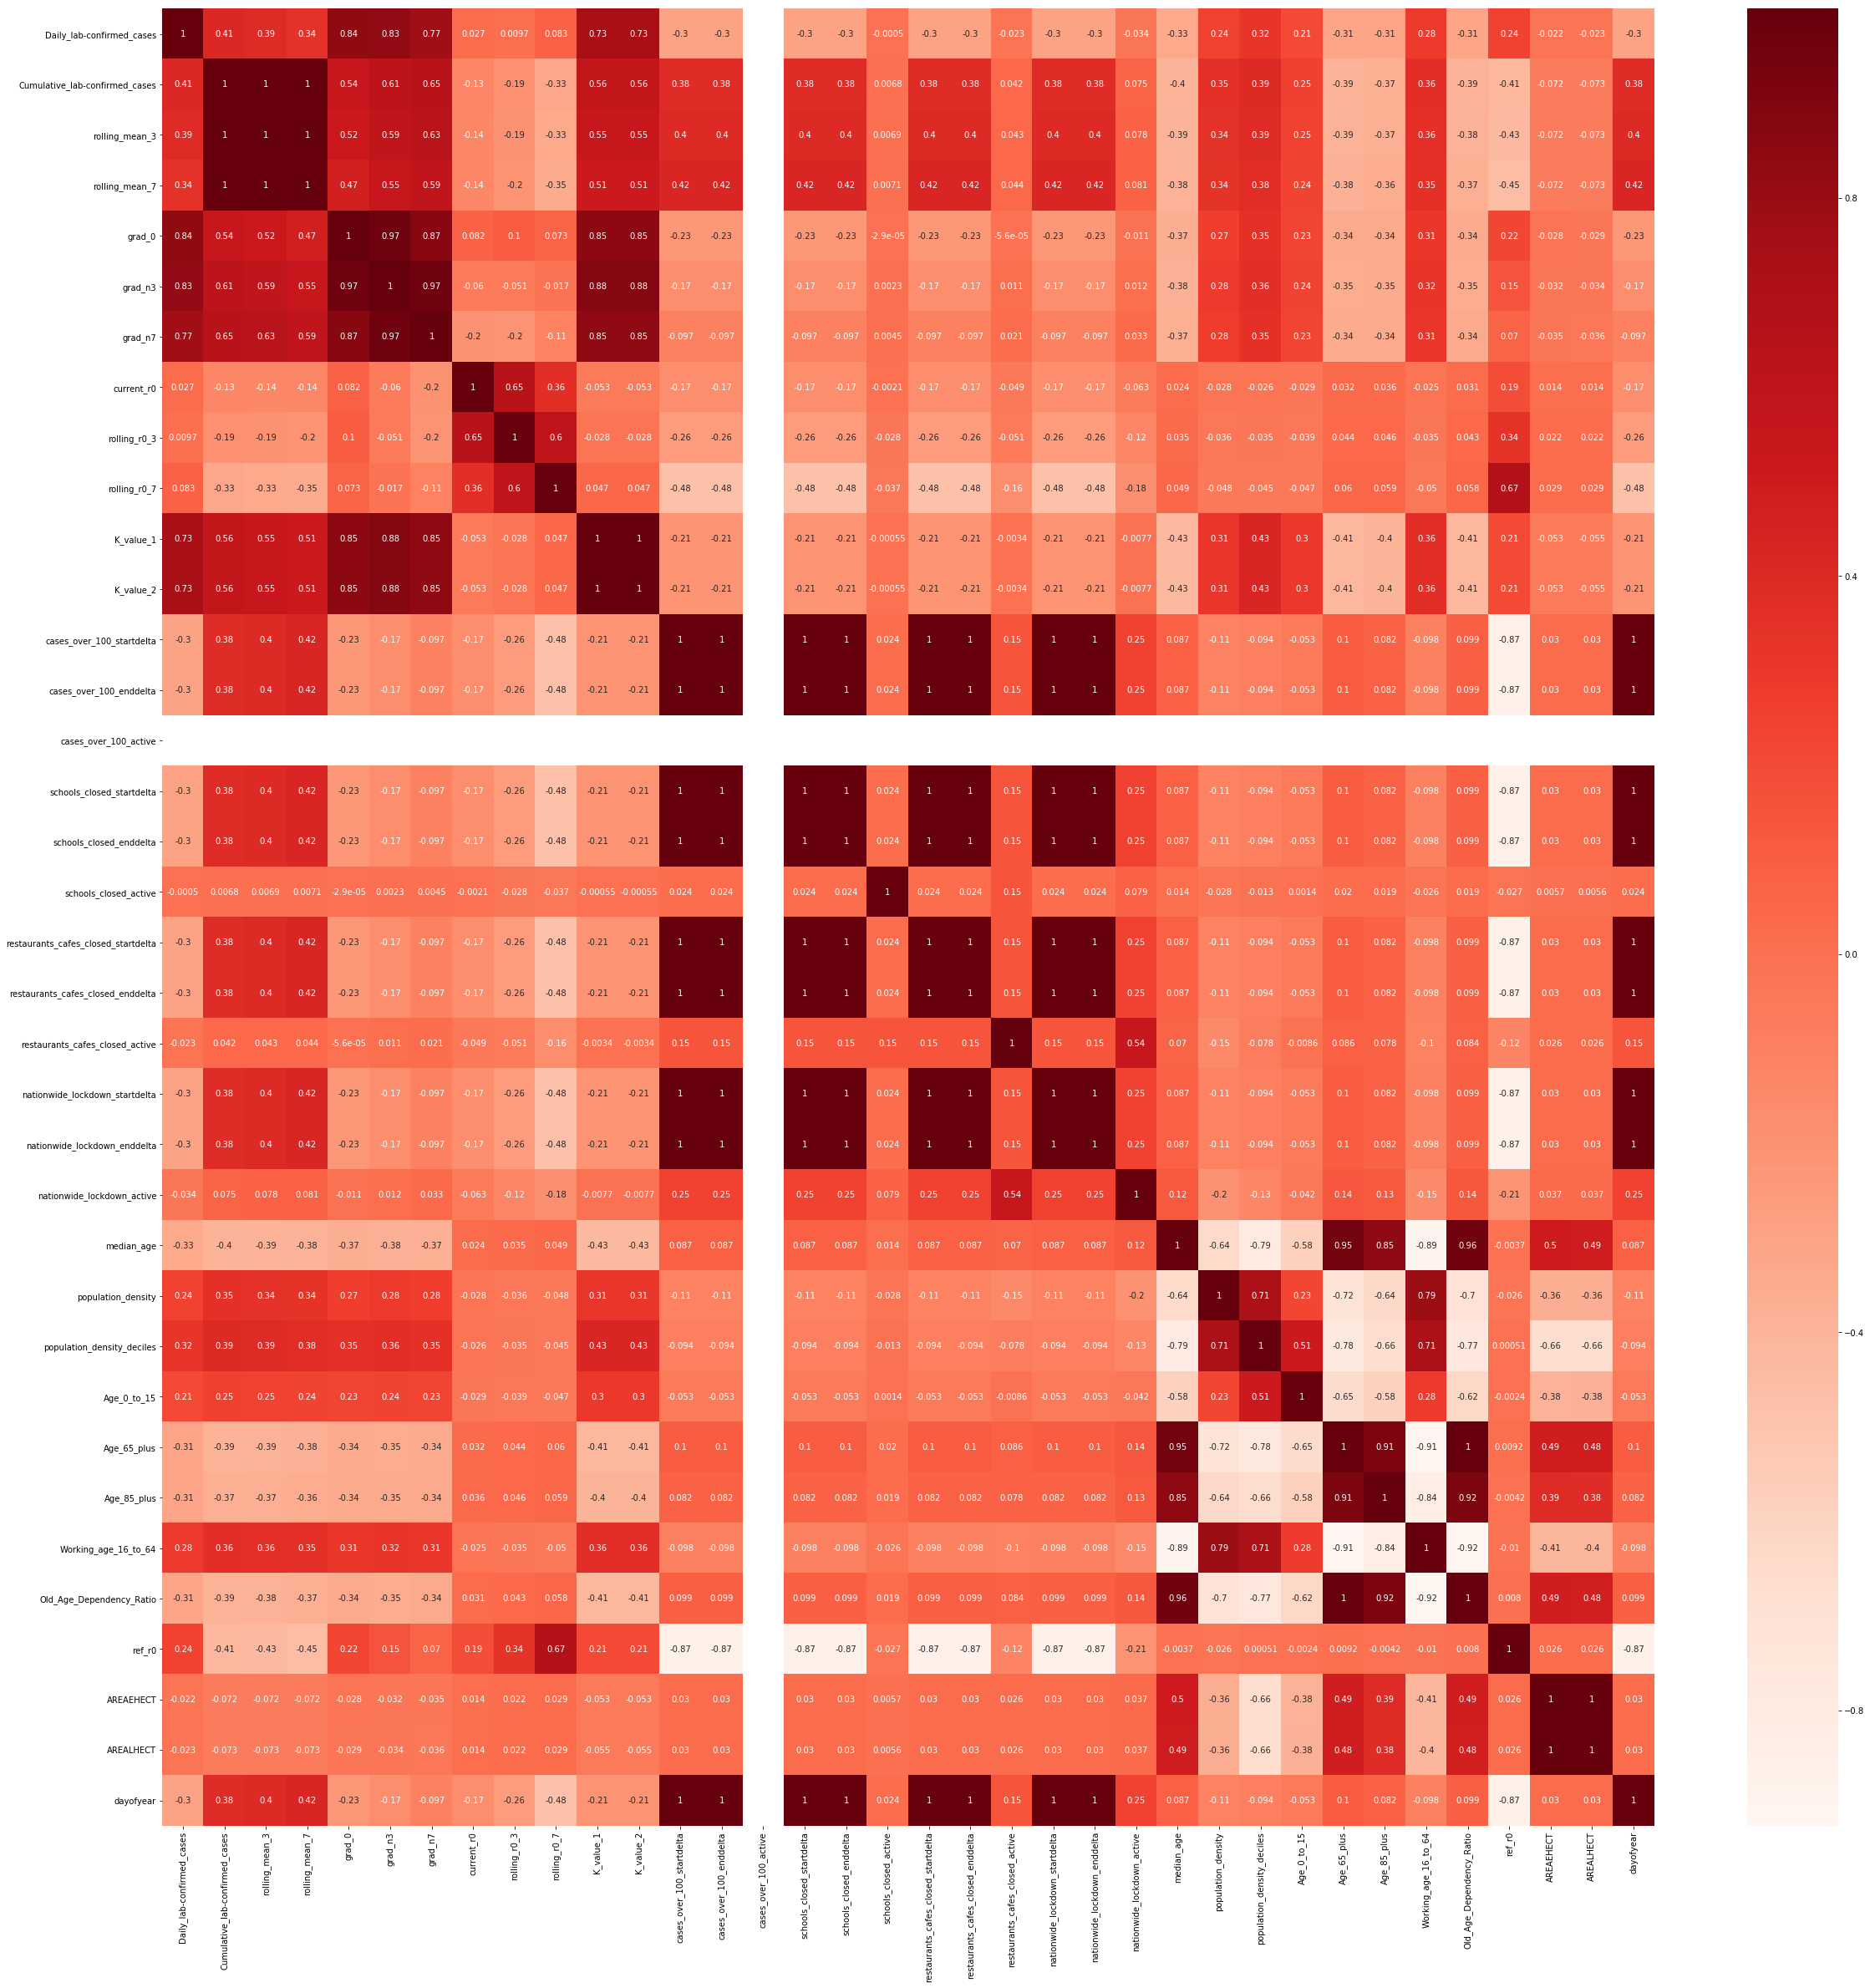

Daily_lab-confirmed_cases              1.000000
Cumulative_lab-confirmed_cases         0.413801
rolling_mean_3                         0.387193
rolling_mean_7                         0.344024
grad_0                                 0.836803
grad_n3                                0.830468
grad_n7                                0.768625
K_value_1                              0.733967
K_value_2                              0.733967
cases_over_100_startdelta              0.297899
cases_over_100_enddelta                0.297899
schools_closed_startdelta              0.297899
schools_closed_enddelta                0.297899
restaurants_cafes_closed_startdelta    0.297899
restaurants_cafes_closed_enddelta      0.297899
nationwide_lockdown_startdelta         0.297899
nationwide_lockdown_enddelta           0.297899
median_age                             0.334028
population_density                     0.244002
population_density_deciles             0.318412
Age_0_to_15                            0

In [96]:
build_pearson_correlation_matrix_of_dataframe(40,40,df,"Daily_lab-confirmed_cases",0.2)

# XGBoost

### Separating the data into X and y (i.e. feature and target variables)

In [107]:
y = df[['Daily_lab-confirmed_cases']]

X = df.drop(['Daily_lab-confirmed_cases'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Normalizing the feature variables

In [108]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Instantiate the XGBoost model

In [109]:
xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.35,
                max_depth = 10, alpha = 0.1, n_estimators = 100)

### Fitting the XGBoost model

In [110]:
xgboost_regression.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Defining a function to print out the results of a model

In [111]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    print ("\n")
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print ("RMSE:\n")
    print (rmse)

### Printing out the results of the XGBoost model

In [112]:
printing_out_results_of_a_model(xgboost_regression,X_test,y_test)

R2 score:

74.50 %


Mean-squared error:

25.273164891981278


RMSE:

5.027242275043175


### Conclusion

The XGBoost model gives good results but we have to use hyperparameters tuning to see the final result.

# Hyperparameters tuning the XGBoost model

## Random Search

In [68]:
print(xgboost_regression.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'alpha': 0.1}


### Declaring the Grid for the Random Search

In [69]:
random_grid = {
    
 "learning_rate"    : [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
               
 "max_depth"        : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "min_child_weight" : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "gamma"            : [ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05 ],
    
 "subsample"        : [0.5, 0.6, 0.7, 0.8, 0.9 ],
    
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9 ],

}

### Instantiating the Random Search for the XGBoost model

In [70]:
xgb_random = RandomizedSearchCV(estimator = xgboost_regression, param_distributions = random_grid, n_iter = 200, cv = 5, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the XGBoost model

In [71]:
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]},
          pre_disp

### Printing out the best hyperparameters for the XGBoost model

In [72]:
xgb_random.best_params_

{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.03,
 'colsample_bytree': 0.9}

### Printing out the results of the XGBoost model after Random Search 

In [73]:
printing_out_results_of_a_model(xgb_random,X_test,y_test)

R2 score:

77.28 %


Mean-squared error:

22.516644811234425


RMSE:

4.745170683045492


### Plotting the features importances for the XGBoost model

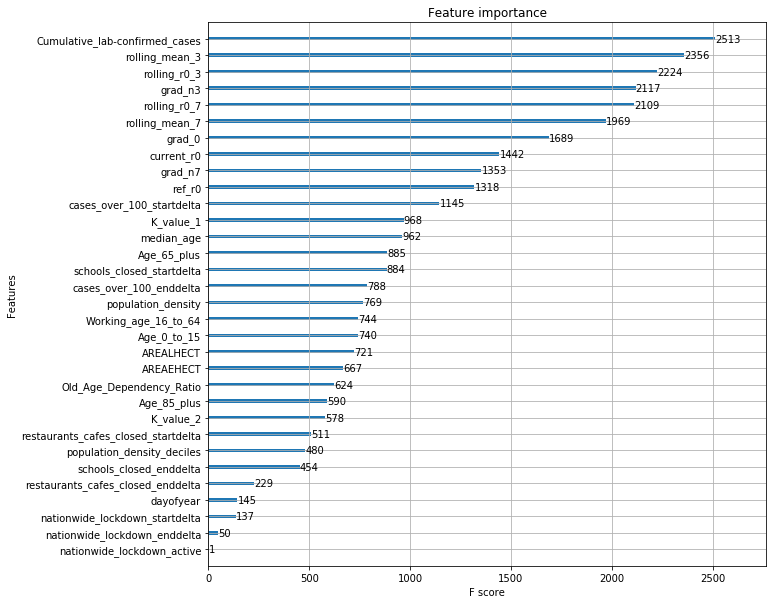

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgboost_regression, ax = ax)
plt.savefig('Images/xgboost_features_importance.png', bbox_inches='tight')
plt.show()

### Plotting out one Tree of the XGBoost model

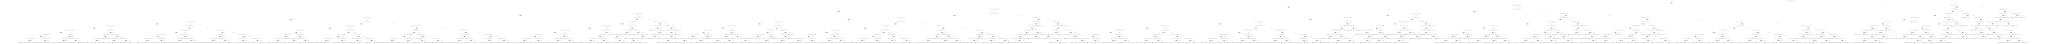

In [75]:
xgb.to_graphviz(xgboost_regression, num_trees=1)

### Export the image of one Tree of the XGBoost model

In [77]:
format = 'png' 

image = xgb.to_graphviz(xgboost_regression, num_trees = 1)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'200'}

image.render('Images/xgboost_tree', format = format)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.282508 to fit


'Images/xgboost_tree.png'

# Conclusion

The accuracy reached by the XGBoost regression model is already quite high, but we can definitely improve it by dropping several variables that have a low F-score and trying a larger number of fits for the Random Search.

# 2nd try: XGBoost

### Separating the data into X and y (i.e. feature and target variables)

In [133]:
y = df[['Daily_lab-confirmed_cases']]

X = df.drop(['Daily_lab-confirmed_cases','nationwide_lockdown_active','nationwide_lockdown_enddelta','nationwide_lockdown_startdelta'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Normalizing the feature variables

In [134]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Notes

Here, normalization is not used as it erases the name of the columns of the dataframe, which is needed for printing out the features importances.

### Instantiate the XGBoost model

In [135]:
xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.35,
                max_depth = 10, alpha = 0.1, n_estimators = 100)

### Fitting the XGBoost model

In [136]:
xgboost_regression.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Defining a function to print out the results of a model

In [137]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    print ("\n")
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print ("RMSE:\n")
    print (rmse)

### Printing out the results of the XGBoost model

In [138]:
printing_out_results_of_a_model(xgboost_regression,X_test,y_test)

R2 score:

72.84 %


Mean-squared error:

26.918814436383137


RMSE:

5.188334456873721


### Plotting the features importances for the XGBoost model

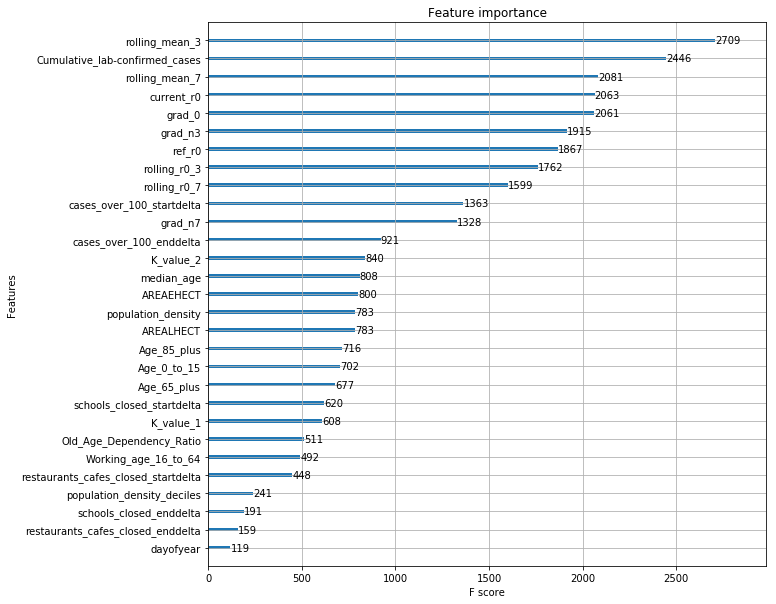

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgboost_regression, ax = ax)
plt.savefig('Images/xgboost_features_importance.png', bbox_inches='tight')
plt.show()

### Conclusion

The XGBoost model gives good results but we have to use hyperparameters tuning to see the final result.

# Hyperparameters tuning the XGBoost model

## Random Search

In [124]:
print(xgboost_regression.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'alpha': 0.1}


### Declaring the Grid for the Random Search

In [125]:
random_grid = {
    
 "learning_rate"    : [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
               
 "max_depth"        : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "min_child_weight" : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "gamma"            : [ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1 ],
    
 "subsample"        : [0.5, 0.6, 0.7, 0.8, 0.9 , 1],
    
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9 , 1],

}

### Instantiating the Random Search for the XGBoost model

In [126]:
xgb_random = RandomizedSearchCV(estimator = xgboost_regression, param_distributions = random_grid, n_iter = 1000, cv = 5, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the XGBoost model

In [127]:
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]},
          pre_disp

### Printing out the best hyperparameters for the XGBoost model

In [128]:
xgb_random.best_params_

{'subsample': 0.9,
 'min_child_weight': 11,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.05,
 'colsample_bytree': 0.9}

### Printing out the results of the XGBoost model after Random Search 

In [129]:
printing_out_results_of_a_model(xgb_random,X_test,y_test)

R2 score:

77.51 %


Mean-squared error:

22.285695237335368


RMSE:

4.720772737310638


### Plotting out one Tree of the XGBoost model

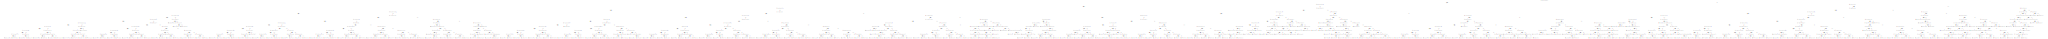

In [131]:
xgb.to_graphviz(xgboost_regression, num_trees=1)

### Export the image of one Tree of the XGBoost model

In [132]:
format = 'png' 

image = xgb.to_graphviz(xgboost_regression, num_trees = 1)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'200'}

image.render('Images/xgboost_tree', format = format)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.246769 to fit


'Images/xgboost_tree.png'

# 3rd try: XGBoost

### Separating the data into X and y (i.e. feature and target variables)

In [169]:
y = df[['Daily_lab-confirmed_cases']]

X = df.drop(['Daily_lab-confirmed_cases','nationwide_lockdown_active','nationwide_lockdown_enddelta','nationwide_lockdown_startdelta','restaurants_cafes_closed_startdelta','restaurants_cafes_closed_enddelta','restaurants_cafes_closed_active','schools_closed_startdelta','schools_closed_enddelta','schools_closed_active'], axis = 1)

# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Normalizing the feature variables

In [170]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

### Notes

Here, normalization is not used as it erases the name of the columns of the dataframe, which is needed for printing out the features importances.

### Instantiate the XGBoost model

In [171]:
xgboost_regression = xgb.XGBRegressor(booster = 'gbtree', objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.35,
                max_depth = 10, alpha = 0.1, n_estimators = 100)

### Fitting the XGBoost model

In [172]:
xgboost_regression.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Defining a function to print out the results of a model

In [173]:
def printing_out_results_of_a_model(model,X_test,y_test):

    # Use the model on the testing data to predict the results

    y_pred = model.predict(X_test)

    # Print the R2 score 

    print ("R2 score:\n") 
    print (('{:.2f}'.format((100*(r2_score(y_test, y_pred))))) + " %")

    print ("\n")

    # Print the mean squared error

    print ("Mean-squared error:\n")
    print(mean_squared_error(y_test, y_pred))
    
    print ("\n")
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print ("RMSE:\n")
    print (rmse)

### Printing out the results of the XGBoost model

In [174]:
printing_out_results_of_a_model(xgboost_regression,X_test,y_test)

R2 score:

73.30 %


Mean-squared error:

26.463407893353352


RMSE:

5.144259703140322


### Plotting the features importances for the XGBoost model

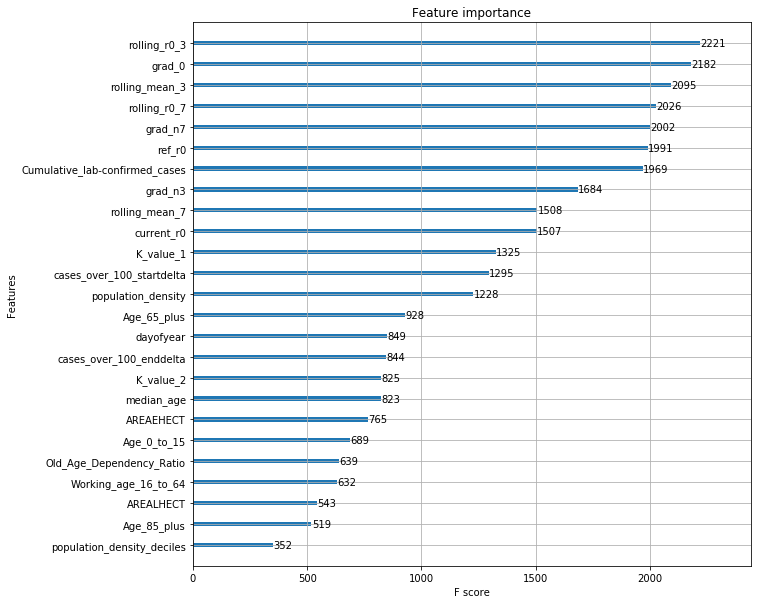

In [175]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(xgboost_regression, ax = ax)
plt.savefig('Images/xgboost_features_importance.png', bbox_inches='tight')
plt.show()

### Conclusion

The XGBoost model gives good results but we have to use hyperparameters tuning to see the final result.

# Hyperparameters tuning the XGBoost model

## Random Search

In [176]:
print(xgboost_regression.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.3, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.35, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'reg:squarederror', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1, 'alpha': 0.1}


### Declaring the Grid for the Random Search

In [177]:
random_grid = {
    
 "learning_rate"    : [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
               
 "max_depth"        : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "min_child_weight" : [ 1, 2, 3, 4, 5, 6, 7 , 8, 9, 10, 11, 12, 13, 14, 15 ],
    
 "gamma"            : [ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1 ],
    
 "subsample"        : [0.5, 0.6, 0.7, 0.8, 0.9 , 1],
    
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9 , 1],

}

### Instantiating the Random Search for the XGBoost model

In [178]:
xgb_random = RandomizedSearchCV(estimator = xgboost_regression, param_distributions = random_grid, n_iter = 1000, cv = 5, verbose=2, random_state=42, n_jobs = -1)

### Fitting the Random Search for the XGBoost model

In [179]:
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 39.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.35, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'gamma': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
      

### Printing out the best hyperparameters for the XGBoost model

In [180]:
xgb_random.best_params_

{'subsample': 1,
 'min_child_weight': 14,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.02,
 'colsample_bytree': 0.9}

### Printing out the results of the XGBoost model after Random Search 

In [181]:
printing_out_results_of_a_model(xgb_random,X_test,y_test)

R2 score:

78.12 %


Mean-squared error:

21.67754044496843


RMSE:

4.655914565900928


### Plotting out one Tree of the XGBoost model

In [182]:
xgb.to_graphviz(xgboost_regression, num_trees=1)

### Export the image of one Tree of the XGBoost model

In [183]:
format = 'png' 

image = xgb.to_graphviz(xgboost_regression, num_trees = 1)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'200'}

image.render('Images/xgboost_tree', format = format)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.179043 to fit


'Images/xgboost_tree.png'

# Conclusion

The accuracy reached by the XGBoost regression model is of 78 %. To go above this, we will have to change the dataset.